<a href="https://colab.research.google.com/github/Sathishk2/Computer-Vision/blob/main/CNN_cats_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ex: Cats and Dogs**

In [ ]:
import tensorflow as tf
print(tf.__version__)

#
# Check if we got GPU
#
print(tf.test.gpu_device_name()) #Returns the name of a GPU device if available

2.15.0
/device:GPU:0


In [ ]:
#
# Mount drive to connect to Google Drive (for accessing input data file)
#
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Step 1 Prepare Data#

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# (inside the zipped folder)
# cats_and_dogs_filtered
#          |
#          |- train
#          |    |- cats (1000 jpgs of cats)
#          |    |- dogs (1000 jpgs of dogs)
#          |
#          |- validation
#               |- cats (500 jpgs of cats)
#               |- dogs (500 jpgs of dogs)
#
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

#
# get the file from _URL and extract contents out in temp folder
# the zip file is stored in the temp folder (/root/.keras/datasets)
# at the same time, it also extract out the files/folders and put them in the temp folder too
#
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True) #this tf tool extract the zip files/folders too!
print(path_to_zip) #the zip file (full pathname) downloaded to temp folder

# cats_and_dogs_filtered folder from the zip file is extracted here
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
print(PATH)

68606236/68606236 [==============================] - 0s 0us/step
/root/.keras/datasets/cats_and_dogs.zip
/root/.keras/datasets/cats_and_dogs_filtered


In [ ]:
!ls -la /root/.keras/datasets

total 67012
drwxr-xr-x 3 root root     4096 Mar 27 03:49 .
drwxr-xr-x 3 root root     4096 Mar 27 03:49 ..
drwxr-xr-x 4 root root     4096 Mar 27 03:49 cats_and_dogs_filtered
-rw-r--r-- 1 root root 68606236 Mar 27 03:49 cats_and_dogs.zip


In [ ]:
!ls -la /root/.keras/datasets/cats_and_dogs_filtered

total 20
drwxr-xr-x 4 root root 4096 Mar 27 03:49 .
drwxr-xr-x 3 root root 4096 Mar 27 03:49 ..
drwxr-xr-x 4 root root 4096 Mar 27 03:49 train
drwxr-xr-x 4 root root 4096 Mar 27 03:49 validation
-rw-r--r-- 1 root root  140 Mar 27 03:49 vectorize.py


In [ ]:
!ls -la /root/.keras/datasets/cats_and_dogs_filtered/train
!ls -la /root/.keras/datasets/cats_and_dogs_filtered/validation

total 80
drwxr-xr-x 4 root root  4096 Mar 27 03:49 .
drwxr-xr-x 4 root root  4096 Mar 27 03:49 ..
drwxr-xr-x 2 root root 36864 Mar 27 03:49 cats
drwxr-xr-x 2 root root 36864 Mar 27 03:49 dogs
total 48
drwxr-xr-x 4 root root  4096 Mar 27 03:49 .
drwxr-xr-x 4 root root  4096 Mar 27 03:49 ..
drwxr-xr-x 2 root root 20480 Mar 27 03:49 cats
drwxr-xr-x 2 root root 20480 Mar 27 03:49 dogs


In [ ]:
train_dir = os.path.join(PATH, 'train') # training folder
validation_dir = os.path.join(PATH, 'validation') # validation folder
print(train_dir)
print(validation_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/validation


In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [ ]:
print(train_cats_dir)
print(train_dogs_dir)
print(validation_cats_dir)
print(validation_dogs_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [ ]:
# Define some constants
BATCH_SIZE = 100
EPOCHS = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
# Create ImageDataGenerator objects with transformation parameters
train_image_generator = ImageDataGenerator(rescale=1.0/255.0)
validation_image_generator = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
# Images are flowed from directory with specified BATCH_SIZE
train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           batch_size=BATCH_SIZE,
                                                           class_mode='categorical')

val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE,
                                                              class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# cats=0, dogs=1, based on folder names in alphabetical order
print(train_data_gen.class_indices)
print(val_data_gen.class_indices)

{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}


#Step 2 Build Model#

In [ ]:
#
# Create Model for Classification
#
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3), padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten()) #turn all the output feature maps into a single dense layer so as to connect to the 64 nodes FC layer
model.add(Dense(64, activation='relu')) #FC or NN or Dense layer
model.add(Dense(2, activation='softmax')) #2 classes, need softmax to output probabilities, cats - 0, dogs - 1

In [ ]:
#
# Specify optimizer, loss function and metrics during compilation
#
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy']) # "accuracy" is for evaluating model performance

#Step 3 & 4 Train & Evaluate Model#

In [ ]:
#steps per epoch means number of batches used per epoch. It is
#the number of batch iterations before a training epoch is considered finished.
#
#use this to calculate: steps_per_epoch = (len(train data) // batch_size)
#                       validation_steps = (len(validate data) // batch_size)
#
# steps_per_epoch = 2000 samples per epoch // 100 per batch = 20 batches per epoch
# validation_steps = 1000 samples per epoch // 100 per batch = 10 batches per epoch
#
#Keep in mind that the data generator is meant to loop indefinitely.
#Since the function is intended to loop indefinitely, tf has no ability to determine when one epoch starts and a new epoch begins.
#So, we compute the steps_per_epoch value as number of batches to be processed before counting as an epoch. Similar for validation.
#Once tf hits this step count, it knows that it’s a new epoch (think of it as major and minor epoch)
#
history = model.fit(
      train_data_gen,    #which gen to use for training
      steps_per_epoch=20, #no of training batches per epoch
      epochs=EPOCHS,
      validation_data=val_data_gen, #which gen to use for testing
      validation_steps=10) #no of validation batches per epoch

Epoch 1/15
20/20 [==============================] - 11s 311ms/step - loss: 0.8608 - accuracy: 0.4950 - val_loss: 0.6899 - val_accuracy: 0.5090
Epoch 2/15
20/20 [==============================] - 5s 231ms/step - loss: 0.6869 - accuracy: 0.5280 - val_loss: 0.6834 - val_accuracy: 0.5570
Epoch 3/15
20/20 [==============================] - 6s 288ms/step - loss: 0.6651 - accuracy: 0.5740 - val_loss: 0.6495 - val_accuracy: 0.6230
Epoch 4/15
20/20 [==============================] - 4s 227ms/step - loss: 0.6302 - accuracy: 0.6635 - val_loss: 0.6376 - val_accuracy: 0.6660
Epoch 5/15
20/20 [==============================] - 6s 284ms/step - loss: 0.5927 - accuracy: 0.7185 - val_loss: 0.6242 - val_accuracy: 0.6220
Epoch 6/15
20/20 [==============================] - 4s 225ms/step - loss: 0.5483 - accuracy: 0.7595 - val_loss: 0.6280 - val_accuracy: 0.6490
Epoch 7/15
20/20 [==============================] - 5s 240ms/step - loss: 0.5107 - accuracy: 0.7965 - val_loss: 0.6165 - val_accuracy: 0.6670
Epoch

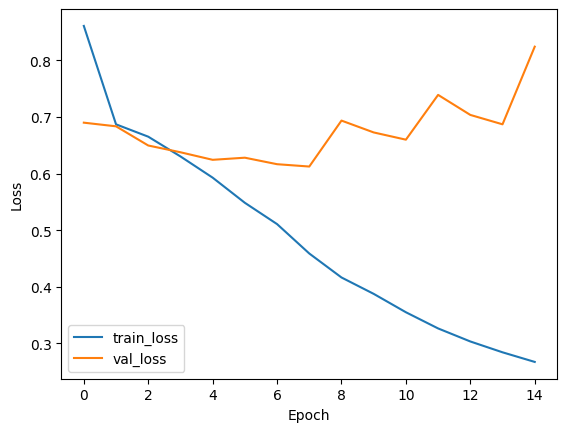

In [ ]:
#
# Visualization of Loss and Accuracy
#
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train_loss')
plt.plot(epoch, val_loss, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

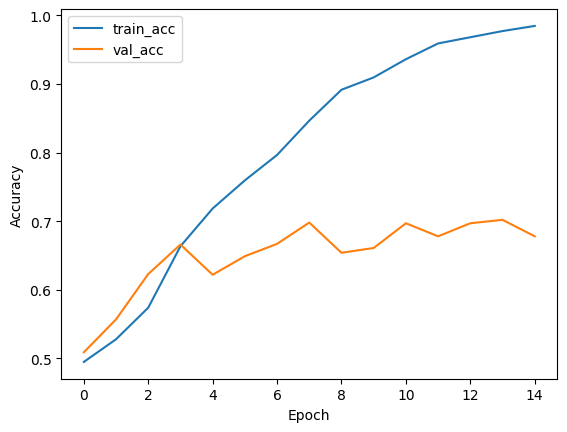

In [ ]:
plt.plot(epoch, acc, label='train_acc')
plt.plot(epoch, val_acc, label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#
# Save Model
#
model.save('/content/drive/MyDrive/app/cats_dogs_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Step 5 Make Prediction#

In [ ]:
#
# Note: we didn't do any saving and loading here
#       we use the trained model directly
#
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

#
# dog images for validation stored at validation_dogs_dir
#
object=['cat','dog']

for p in range(10):
  img = load_img(path=validation_dogs_dir+'/dog.'+str(2000+p)+'.jpg', color_mode="rgb", target_size=(150,150))
  imgArray = img_to_array(img) #convert to numpy array
  imgInput = imgArray.reshape(1,150,150,3)/255.0

  predictions = model.predict(imgInput)
  print(predictions)
  print("%s %.4f %s" % ('dog.'+str(2000+p)+'.jpg:', predictions[0][1], object[int(predictions[0][1]>0.5)])) # cat=0, dog=1

1/1 [==============================] - 0s 280ms/step
[[2.623607e-06 9.999974e-01]]
dog.2000.jpg: 1.0000 dog
1/1 [==============================] - 0s 27ms/step
[[0.27531406 0.72468597]]
dog.2001.jpg: 0.7247 dog
1/1 [==============================] - 0s 29ms/step
[[1.5764181e-05 9.9998426e-01]]
dog.2002.jpg: 1.0000 dog
1/1 [==============================] - 0s 27ms/step
[[0.016078 0.983922]]
dog.2003.jpg: 0.9839 dog
1/1 [==============================] - 0s 27ms/step
[[0.00142114 0.9985789 ]]
dog.2004.jpg: 0.9986 dog
1/1 [==============================] - 0s 26ms/step
[[0.57122856 0.42877144]]
dog.2005.jpg: 0.4288 cat
1/1 [==============================] - 0s 24ms/step
[[0.6337642  0.36623576]]
dog.2006.jpg: 0.3662 cat
1/1 [==============================] - 0s 27ms/step
[[0.05281448 0.94718546]]
dog.2007.jpg: 0.9472 dog
1/1 [==============================] - 0s 27ms/step
[[0.6337642  0.36623576]]
dog.2008.jpg: 0.3662 cat
1/1 [==============================] - 0s 27ms/step
[[0.5749871  0

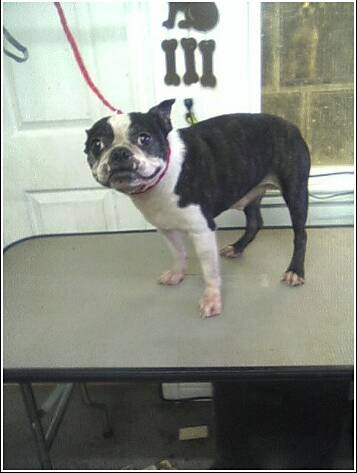

In [ ]:
from IPython.display import Image
Image(filename=validation_dogs_dir+'/dog.2006.jpg')

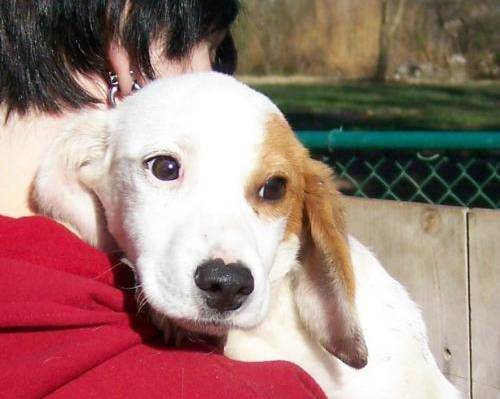

In [ ]:
from IPython.display import Image
Image(filename=validation_dogs_dir+'/dog.2008.jpg')

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/app/img_dog_bw.jpg',width=640)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/app/img_dog_bw.jpg'

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

object=['cat','dog']

img = load_img(path='/content/drive/MyDrive/app/img_dog_bw.jpg', color_mode="rgb", target_size=(150,150))
imgArray = img_to_array(img) #convert to numpy array
imgInput = imgArray.reshape(1,150,150,3)/255.0

predictions = model.predict(imgInput)
print(predictions)
print("%.4f %s" % (predictions[0][1], object[int(predictions[0][1]>0.5)])) # cat=0, dog=1

**Making predictions on many pictures**

In [ ]:
#
# Note: we didn't do any saving and loading here
#       we use the trained model directly
#
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

#
# dog images for validation stored at validation_dogs_dir
#
object=['cat','dog']

for p in range(10):
  img = load_img(path=validation_dogs_dir+'/dog.'+str(2000+p)+'.jpg', color_mode="rgb", target_size=(150,150))
  imgArray = img_to_array(img) #convert to numpy array
  imgInput = imgArray.reshape(1,150,150,3)/255.0

  predictions = model.predict(imgInput)
  print(predictions)
  print("%s %.4f %s" % ('dog.'+str(2000+p)+'.jpg:', predictions[0][1], object[int(predictions[0][1]>0.5)])) # cat=0, dog=1